In [1]:
#here collection if different polotting approaches

#hovering dots:

import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

%matplotlib qt

x = np.random.rand(15)
y = np.random.rand(15)
names = np.array(list("ABCDEFGHIJKLMNO"))
c = np.random.randint(1,5,size=15)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
#xytext - how far from the dot the text is, bbox - box with name inside, arrowprops - to draw arrow

annot.set_visible(False)

def update_annot(ind, name):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos #resets the xy values from annot above
    text = name
    annot.set_text(text) #resets the text from annot above
    
    #annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    #annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind, name="halloo")
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

qt.qpa.drawing: Layer-backing can not be explicitly controlled on 10.14 when built against the 10.14 SDK


In [3]:
# Save interactive plots:
#%matplotlib qt

tit='mags'
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot([1,2,3],[10,-10,30])
#Save:
import pickle
f_handle=open('picture_'+tit+'.fig.pickle', 'wb')
pickle.dump(fig, f_handle) # This is for Python 3 - py2 may need `file` instead of `open`
f_handle.close()
plt.close('all')


In [5]:

#Reopen:
%matplotlib qt
figx = pickle.load(open('picture_'+tit+'.fig.pickle', 'rb'))
figx.show() # Show the figure, edit it, etc.!

qt.qpa.drawing: Layer-backing can not be explicitly controlled on 10.14 when built against the 10.14 SDK


In [ ]:
#STATIC BOXPLOT (REMOVED FROM FUNKS COS UGLY)

def boxplot_std_static(std_data, tit='Magnetometers', channel_names=mags):

    # Make std BOXPLOT for entire data - all channels.
    # Looks horrrible

    import seaborn as sns
    from matplotlib import pyplot as plt
    import pandas as pd

    %matplotlib qt

    ch_only_name_mag=[m[0] for m in channel_names] #names of channels for annotating the plot
    #std_mags_df = pd.DataFrame(std_mags, index = ch_only_name_mag) #put all stds into a data frame with channels name as index

    #Boxplot with seaborn:
    fig, ax = plt.subplots()
    bp=sns.boxplot(data=std_data)
    sw=sns.swarmplot(data=std_data, color=".25", ax=ax) 
    plt.xlabel("Standard deviation")

    #Find what x values did boxplot assign to the y values of std data:
    #my_offsets = ax.collections[0].get_offsets()

    my_round =11 # rounding needed to deal with imperfect precision
    my_dict = {y.round(my_round):x for x,y in ax.collections[0].get_offsets()} # turn array into dict

    #Now annotate the dots (use std data as y and found assigned values as x for annotation):
    for i, txt in enumerate(ch_only_name_mag):
        std_val=str(std_mags[i])
        this_label = txt+': '+std_val
        this_y = std_mags[i]
        this_x = my_dict[this_y.round(my_round)] # use y-position to get seaborn-generated x-position
        annot = ax.annotate(xy=(this_x,this_y),text=this_label,xytext=(100,100), textcoords= "offset points",
                        bbox=dict(boxstyle="round", fc="w"),
                        arrowprops=dict(arrowstyle="->")) # add label
        sns.despine()

    ax.set_title(tit)
    plt.show()



In [ ]:
boxplot_std_static(std_data=std_mags, tit='Magnetometers', channel_names=mags)

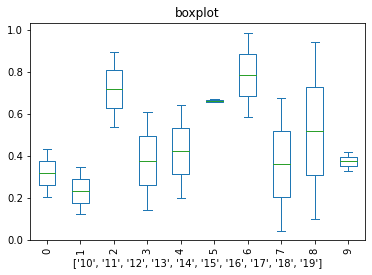

In [6]:
# put multiple boxplots in 1 plot:
# https://www.tutorialspoint.com/plot-multiple-boxplots-in-one-graph-in-pandas-or-matplotlib

%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Set the figure size
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box1": np.random.rand(10), "Box2": np.random.rand(10)})
data_transposed = data.T 

# Plot the dataframe
#ax = data[['Box1', 'Box2']].plot(kind='box', title='boxplot')

nam=[]
for n in list(range(10, 20)):
    nam.append(str(n))

ax = data_transposed.plot(kind='box', rot=90, title='boxplot')
plt.xlabel(nam)

# Display the plot
plt.show()

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib qt

# initialize dataframe
n = 200
ngroup = 3
df = pd.DataFrame({'channel': map(np.floor, np.random.rand(n) * ngroup), 'std_val': np.random.rand(n)})

df.insert(loc=0, column='mag_n', value=df.index)

channel = 'mag_n'
std_lvl = 'std_val'
grouped = df.groupby(channel)

names, vals, xs = [], [] ,[]

for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[std_lvl].tolist())
    xs.append(np.random.normal(i+1, 0, subdf.shape[0])) #here is to create dots not in 1 line. awesome!


plt.boxplot(vals, labels=names)
ngroup = len(vals)

for x, val in zip(xs, vals):
    plt.scatter(x, val, alpha=0.4, color='r')




df


qt.qpa.drawing: Layer-backing can not be explicitly controlled on 10.14 when built against the 10.14 SDK


,mag_n,channel,std_val
0,0,0.0,0.475386
1,1,0.0,0.681219
2,2,0.0,0.265316
3,3,2.0,0.801202
4,4,1.0,0.699656
...,...,...,...
195,195,0.0,0.113392
196,196,1.0,0.550265
197,197,0.0,0.976348
198,198,2.0,0.558591


In [13]:
channels=102

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt

x = pd.DataFrame(np.random.randn(7, channels))
fig = plt.figure()
ax = plt.subplot(111)
for i in range(channels):
    ax.boxplot(x.iloc[:,i].values, positions = [i])
    sc = plt.scatter([i]*len(x.iloc[:,i].values), x.iloc[:,i].values, color=".25", s=3) 
  
#ax.set_xlim(-0.5, 9.5)
plt.show()
x

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,-0.226700,-0.172161,-0.774089,-0.757534,0.509879,-1.677276,1.429423,-1.038275,-1.517181,1.499658,...,0.539491,-1.486773,-2.104275,2.002780,-0.403510,-0.040212,0.123293,1.666857,0.495263,-0.582074
1,-0.925191,0.208155,-0.079560,-0.829790,1.058511,-0.330034,-0.462690,1.460234,-1.037914,1.301750,...,-0.258950,-1.441857,1.396597,-0.376422,2.450202,-0.608424,-2.069884,0.314450,0.597093,-0.310802
2,0.515109,0.151259,0.561422,-0.945691,-0.215001,-1.634391,0.742371,-0.205849,-1.631222,2.317082,...,0.558313,0.485523,0.892658,-0.410463,1.097966,-1.384178,1.160137,1.507948,-0.044774,1.562622
3,-0.762875,-1.024944,-0.197752,0.288000,-0.798648,0.336621,-1.034317,0.451813,0.661923,0.450376,...,0.638109,-1.003171,0.375995,-0.665582,-0.860518,0.235635,0.050261,0.256043,-0.712731,0.330405
4,1.061082,-1.386455,0.423203,1.608413,0.429460,-0.483403,0.374895,-0.741594,0.420672,0.666325,...,1.444236,-0.939471,-0.127897,1.554834,-0.006442,-0.246517,0.003557,-1.068384,0.270919,-0.304708
5,1.573527,-2.278249,-0.566502,0.576336,0.749133,-0.342095,0.173190,-1.154212,-0.119463,0.198190,...,0.389247,-0.583870,-0.107164,-1.506570,0.997296,-0.238215,-0.525555,-1.613804,-0.717446,-2.150809
6,1.550316,-1.649361,-0.041180,0.163702,-1.304852,0.674874,1.854693,1.338581,0.379956,2.189615,...,-0.280436,-0.628831,-0.138600,0.153532,-2.265169,0.495884,0.433682,1.748547,0.029520,-0.280907


In [3]:
#Make slider in a plot: https://www.geeksforgeeks.org/python-scroll-through-plots/

# Import libraries using import keyword
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

%matplotlib qt
 
# Setting Plot and Axis variables as subplots()
# function returns tuple(fig, ax)
Plot, Axis = plt.subplots()
 
# Adjust the bottom size according to the
# requirement of the user
plt.subplots_adjust(bottom=0.25)
 
# Set the x and y axis to some dummy data
t = np.arange(0.0, 100.0, 0.1)
s = np.sin(2*np.pi*t)
 
# plot the x and y using plot function
l = plt.plot(t, s)
 
# Choose the Slider color
slider_color = 'White'
 
# Set the axis and slider position in the plot
axis_position = plt.axes([0.2, 0.1, 0.65, 0.03],
                         facecolor = slider_color)
slider_position = Slider(axis_position,
                         'Pos', 0.1, 90.0)
 
# update() function to change the graph when the
# slider is in use
def update(val):
    pos = slider_position.val
    Axis.axis([pos, pos+10, -1, 1])
    Plot.canvas.draw_idle()
 
# update function called using on_changed() function
slider_position.on_changed(update)
 
# Display the plot
plt.show()

In [12]:
#Multiple boxplots with slider

# put multiple boxplots in 1 plot:
# https://www.tutorialspoint.com/plot-multiple-boxplots-in-one-graph-in-pandas-or-matplotlib

%matplotlib qt

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Set the figure size
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True

Plot, Axis = plt.subplots()

# Pandas dataframe
data = pd.DataFrame({"Box1": np.random.rand(100), "Box2": np.random.rand(100)})
data_transposed = data.T 

# Plot the dataframe
#ax = data[['Box1', 'Box2']].plot(kind='box', title='boxplot')

nam=[]
for n in list(range(10, 20)):
    nam.append(str(n))

Axis = data_transposed.plot(kind='box', rot=90, title='boxplot')
#plt.xlabel(nam)

# Choose the Slider color
slider_color = 'White'
 
# Set the axis and slider position in the plot
axis_position = plt.axes([0.2, 0.1, 0.65, 0.03],
                         facecolor = slider_color)
slider_position = Slider(axis_position,
                         'Pos', 0.1, 90.0)
 
# update() function to change the graph when the
# slider is in use
def update(val):
    pos = slider_position.val
    Axis.axis([pos, pos+10, 0, 1])
    Plot.canvas.draw_idle()
 
# update function called using on_changed() function
slider_position.on_changed(update)


# Display the plot
plt.show()